# BEE 4750 Homework 5: Mixed Integer and Stochastic Programming

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 12/05/24, 9:00pm

## Overview

### Instructions

-   In Problem 1, you will use mixed integer programming to solve a
    waste load allocation problem.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\fenya\Documents\BEE4750\hw5-fenya`
Precompiling project...
  ✓ BARON
  1 dependency successfully precompiled in 76 seconds. 233 already precompiled.
  1 dependency had output during precompilation:
┌ BARON
│  ┌ Warning: BARON.jl was not built correctly.
│  │ Set the environment variable `BARON_EXEC` and run `using Pkg; Pkg.build("BARON")`.
│  └ @ BARON C:\Users\fenya\.julia\packages\BARON\F0Yw3\src\BARON.jl:14
│  WARNING: could not cache source text for "C:\Users\fenya\.julia\packages\BARON\F0Yw3\deps\path.jl".
└  


In [2]:
using JuMP
using HiGHS
using DataFrames
using GraphRecipes
using Plots
using Measures
using MarkdownTables
using LaTeXStrings
using Graphs

## Problems (Total: 30 Points)

### Problem 1 (30 points)

Three cities are developing a coordinated municipal solid waste (MSW)
disposal plan. Three disposal alternatives are being considered: a
landfill (LF), a materials recycling facility (MRF), and a
waste-to-energy facility (WTE). The capacities of these facilities and
the fees for operation and disposal are provided below.

-   **LF**: Capacity 200 Mg, fixed cost \$2000/day, tipping cost
    \$50/Mg;
-   **MRF**: Capacity 350 Mg, fixed cost \$1500/day, tipping cost
    \$7/Mg, recycling cost \$40/Mg recycled;
-   **WTE**: Capacity 210 Mg, fixed cost \$2500/day, tipping cost
    \$60/Mg;

The MRF recycling rate is 40%, and the ash fraction of non-recycled
waste is 16% and of recycled waste is 14%. Transportation costs are
\$1.5/Mg-km, and the relative distances between the cities and
facilities are provided in the table below.

| **City/Facility** | **Landfill (km)** | **MRF (km)** | **WTE (km)** |
|:-----------------:|:-----------------:|:------------:|:------------:|
|         1         |         5         |      30      |      15      |
|         2         |        15         |      25      |      10      |
|         3         |        13         |      45      |      20      |
|        LF         |        \-         |      32      |      18      |
|        MRF        |        32         |      \-      |      15      |
|        WTE        |        18         |      15      |      \-      |

The fixed costs associated with the disposal options are incurred only
if the particular disposal option is implemented. The three cities
produce 100, 90, and 120 Mg/day of solid waste, respectively, with the
composition provided in the table below.

**Reminder**: Use `round(x; digits=n)` to report values to the
appropriate precision!

**In this problem**:

-   Formulate the waste load allocation problem and implement it in
    `JuMP`.
-   Draw a diagram showing the flows of waste between the cities and the
    facilities. Which facilities (if any) will not be used? Does this
    solution make sense?

# Solution

i = Cities 1,2,3
j = Disposals LF, MRF, WTE

Decision variables:

$W_{i,j}$ Waste transported from city i to disposal j (Mg/day)

$R_{k,j}$ = $R_{MRF,WTE}$, $R_{MRF,LF}$, $R_{WTE,LF}$ Residual waste transported from disposal k to disposal j (Mg/day)

$Y_{j}$ Operational status (on/off) of disposal j (binary)

Parameters

$S_{i}$ = Waste produced at source i (Mg/day)

$K_{j}$ = Capacity of disposal j (Mg/day)

$a$ = Cost of transporting waste from source to disposal ($/Mg-km)

$l_{i,j}$ = Distance between source i and disposal j (km)

$d_{i,j}$ = Distance between disposal k and disposal j (km)

$c_{j}$ = Fixed costs of operating disposal j ($/day)

$b_{j}$ = 	Variable cost (tipping cost) of disposing waste at disposal j ($/Mg)

$p_{MRF}$ = 	Recycling cost ($/Mg)

$rr$ = 	Recycling rate (%)



mimimize total cost = Transportation cost for waste and residual + Fixed Disposal cost + Tipping Cost + Recycling cost

\begin{align}
\min_{W_{i,j}, Y_{j}} \sum_{i \in \mathcal{I}, j \in \mathcal{J}} a*l_{i,j}*W_{i,j} 
+ \sum_{k \in \mathcal{J}, j \in \mathcal{J}} a*d_{k,j}*R_{k,j} + \sum_{j \in J} [c_j*Y_{j} + b_j [\sum_{i \in I} W_{ij}+\sum_{k \in J} R_{k,j}]]\\
 + p_{MRF}*\sum_{i \in I}W_{i,MRF}*rr\\

\text {subject to:}\\

\text {If disposal facility j processes any waste, must be operating}\\
 Y_j = \begin{cases}0 & \text{if} \sum_{i \in I} W_{ij} + \sum_{k \in J} R_{k,j}= 0 \\[0.5em] 1 & \text{if} \sum_{i \in I} W_{ij} + \sum_{k \in J} R_{ij}> 0\end{cases} \forall j \in \mathcal{J}\\

\text {Residual Mass-Balance Constraints}\\
R_{WTE,LF} = 0.16*\sum_{i \in \mathcal{I}} W_{i,WTE} + 0.14*R_{MRF,WTE} \\

R_{MRF,LF} + R_{MRF,WTE} = (1-rr)*\sum_{i \in \mathcal{I}} W_{i,MRF} \\


 \text {Need to dispose of all waste from each source i} \\

 \sum_{j \in J} W_{i,j} +\sum_{k \in J} R_{k,j} = S_i \forall i \in {I}\\

  \text {Capacity limit at each disposal site j} \\

  \sum_{i \in I} W_{i,j} \leq K_j \forall i \in {I}\\

W_{i,j} \geq 0 \qquad \qquad \forall i \in {I},  \forall j \in \mathcal{J}\\

\end{align}


The total cost is $27,809. The resulting allocation is shown on the diagram below. The MRF facility is not used. This makes sense because only 40% of the waste routed there is actually recycled, so a lot of it ultimately has to be processed through other ways anyway, which may limit the usefulness of the MRF so that it is not worthwhile to build. 

In [3]:
a = 1.5
S = [100 90 120]
K = [200 350 210]
l = [5 30 15; 15 25 10; 13 45 20]
d = [0 32 18; 32 0 15; 18 15 0]
c = [2000 1500 2500]
b = [50 7 60]
p_mrf = 40
rr = 0.4

0.4

In [4]:
# define sets
I = 1:3 # Cities 1,2,3
J = 1:3 # LF, MRF, WTE

# waste = Model(BARON.Optimizer)
waste = Model(HiGHS.Optimizer)
# define variables
@variables(waste, begin
    # 0 <= W[i in I, j in J]
    # 0 <= R[k in J, j in J; k != j]
    0 <= W[i in I, j in J] <= 100000
    0 <= R[k in J, j in J; k != j] <= 100000
end)
@variable(waste, Y[j in J], Bin)


@objective(waste, Min,     
    sum(a*l[i,j]*W[i,j] for i in I, j in J) + sum(a*d[k,j]*R[k,j] for k in J, j in J if k != j) + sum((c[j]*Y[j])+b[j]*((sum(W[i,j] for i in I)+(sum(R[k,j] for k in J if k != j)))) for j in J) 
    + p_mrf*rr*sum(R[k,2] for k in J if k != 2)
)

@constraint(waste, OnOff[j in J], !Y[j] => {sum(W[i,j] for i in I)+(sum(R[k,j] for k in J if k != j)) == 0})

# @constraint(waste, OnOff[j in J],  M*Y[j] >= sum(W[i,j] for i in I)+(sum(R[k,j] for k in J if k != j)))
# # wasteOperation = @constraint(waste, [j = J], M*Y[j] >= (sum(W[i,j] for i in I) + sum(R[k,j] for k in J)), base_name = "wasteOperation")


@constraint(waste, MassBalanceWTE, R[3,1] == 0.16*sum(W[i,3] for i in I)+0.14+R[2,3])
@constraint(waste, MassBalanceMRF, R[2,1]+R[2,3] == (1-rr)*sum(W[i,2] for i in I))

@constraint(waste, ResidualFlowsLF[j in J; j != 1], R[1,j] == 0)
@constraint(waste, ResidualFlowsMRF[k in J; k != 2], R[k,2] == 0)

@constraint(waste, AmountOfWaste[i in I], sum(W[i,j] for j in J) == S[i])

@constraint(waste, CapacityLimit[j in J], sum(W[i,j] for i in I) + sum(R[k,j] for k in J if k != j) <= K[j])



# @constraint(gencap, load[t in T], sum(y[:, t]) + NSE[t] >= demand.Demand[t])

# @constraint(gencap, availability[g in G, t in T], y[g, t] <= x[g]*cap_factor[t,g])
optimize!(waste)

Running HiGHS 1.8.1 (git hash: 4a7f24ac6): Copyright (c) 2024 HiGHS under MIT licence terms
Coefficient ranges:
  Matrix [2e-01, 5e+05]
  Cost   [4e+01, 2e+03]
  Bound  [1e+00, 1e+05]
  RHS    [1e-01, 4e+02]
Presolving model
13 rows, 18 cols, 49 nonzeros  0s
9 rows, 14 cols, 44 nonzeros  0s
8 rows, 12 cols, 31 nonzeros  0s

Solving MIP model with:
   8 rows
   12 cols (2 binary, 0 integer, 0 implied int., 10 continuous)
   31 nonzeros
MIP-Timing:       0.022 - starting analytic centre calculation

Src: B => Branching; C => Central rounding; F => Feasibility pump; H => Heuristic; L => Sub-MIP;
     P => Empty MIP; R => Randomized rounding; S => Solve LP; T => Evaluate node; U => Unbounded;
     z => Trivial zero; l => Trivial lower; u => Trivial upper; p => Trivial point

        Nodes      |    B&B Tree     |            Objective Bounds              |  Dynamic Constraints |       Work      
Src  Proc. InQueue |  Leaves   Expl. | BestBound       BestSol              Gap |   Cuts   InLp 

In [5]:
@show objective_value(waste)

objective_value(waste) = 27809.10714285714


27809.10714285714

In [6]:
W_data = @show value.(W).data

value.(W).data = [100.0 0.0 0.0; 0.0 0.0 90.0; 78.88095238095238 0.0 41.11904761904761]


3×3 Matrix{Float64}:
 100.0    0.0   0.0
   0.0    0.0  90.0
  78.881  0.0  41.119

In [7]:
W_data

3×3 Matrix{Float64}:
 100.0    0.0   0.0
   0.0    0.0  90.0
  78.881  0.0  41.119

In [8]:
R_data = @show value.(R).data

value.(R).data = OrderedCollections.OrderedDict((1, 2) => 0.0, (1, 3) => 0.0, (2, 1) => 0.0, (2, 3) => 0.0, (3, 1) => 21.11904761904762, (3, 2) => 0.0)


OrderedCollections.OrderedDict{Tuple{Int64, Int64}, Float64} with 6 entries:
  (1, 2) => 0.0
  (1, 3) => 0.0
  (2, 1) => 0.0
  (2, 3) => 0.0
  (3, 1) => 21.119
  (3, 2) => 0.0

In [9]:
R_data

OrderedCollections.OrderedDict{Tuple{Int64, Int64}, Float64} with 6 entries:
  (1, 2) => 0.0
  (1, 3) => 0.0
  (2, 1) => 0.0
  (2, 3) => 0.0
  (3, 1) => 21.119
  (3, 2) => 0.0

# Diagram

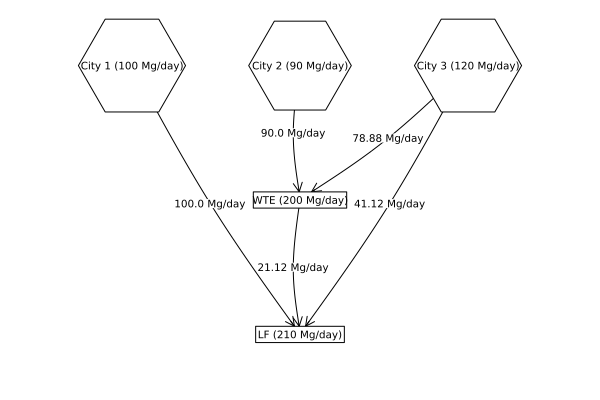

In [10]:
A = [0 0 0 0 1;
    0 0 0 1 0;
    0 0 0 1 1;
    0 0 0 0 1;
    0 0 0 0 0]

names = ["City 1 (100 Mg/day)", "City 2 (90 Mg/day)", "City 3 (120 Mg/day)", "WTE (200 Mg/day)", "LF (210 Mg/day)"]
# modify this dictionary to add labels
nodelabel = [100, 90,120,0,0]

edge_labels = Dict((1, 5) => string(round(W_data[1,1];digits = 2)) * " Mg/day", (2,4) => string(round(W_data[2,3];digits = 2)) * " Mg/day", (3, 4) =>string(round(W_data[3,1];digits = 2)) * " Mg/day", (3, 5) => string(round(W_data[3,3];digits = 2)) * " Mg/day",(4, 5) =>string(round(R_data[3,1];digits = 2)) * " Mg/day")
shapes=[:hexagon, :hexagon, :hexagon,  :rect, :rect]
xpos = [-1.5, -0.25, 1,-0.25, -0.25]
ypos = [1, 1, 1, 0, -1]

# p = graphplot(A, names=names, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
p = graphplot(A, names=names, nodelabel=nodelabel, edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

## References

List any external references consulted, including classmates.

https://stackoverflow.com/questions/27827249/julia-concatenate-string-and-integer